## Data loading

In [2]:
import pandas as pd
import seaborn as sns
sns.set_theme()
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import json
from scipy import stats
import plotly.express as px

import sys
sys.path.append('..')
from helpers import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# First glimpse of all the available movies in the dataset

column_movies = ["film_id", "movie_id", "title", "release_date", "gross_revenue", "duration_min", "language", "country", "categories"]

movies_df = pd.read_csv('../Data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None, names=column_movies)
movies_df.head()

,film_id,movie_id,title,release_date,gross_revenue,duration_min,language,country,categories
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
# Dataframe of all the characters in the movies

column_characters = ["film_id", "movie_id", "release_date", "character", "born_date", "gender", "height", "ethnicity", "actor_name", "actor_age_at_movie_release", "actor_map_ID","character_ID","actor_ID"]

character_df = pd.read_csv('../Data/MovieSummaries/character.metadata.tsv', sep='\t', header=None, names = column_characters)
character_df.head()

,film_id,movie_id,release_date,character,born_date,gender,height,ethnicity,actor_name,actor_age_at_movie_release,actor_map_ID,character_ID,actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [5]:
# List of different actors 
actors = character_df['actor_name'].unique()

# Number of actors per movie  
films = character_df.groupby('movie_id').actor_name.count()

# Number of characters per movie 
char = character_df.groupby('movie_id').character.count()

In [43]:
actor_name = 'Julia Roberts'

# Filter the character_df for rows where actor_name is 'Mithun Chakraborty'
mithun_df = character_df[character_df['actor_name'] == actor_name]

# Get the unique actor ID for Mithun Chakraborty
mithun_actor_ID = mithun_df['actor_ID'].unique()

# Filter movies_df for rows where actor_ID is Mithun Chakraborty's ID
movies_with_mithun = movies_df[movies_df['film_id'].isin(mithun_df['film_id'])]

# Extract the country information for the movies associated with Mithun Chakraborty
countries_of_mithun_movies = movies_with_mithun['country'].explode().unique()

print(countries_of_mithun_movies)

['{"/m/09c7w0": "United States of America"}'
 '{"/m/09c7w0": "United States of America", "/m/07ssc": "United Kingdom", "/m/0345h": "Germany"}'
 '{"/m/09c7w0": "United States of America", "/m/0345h": "Germany"}'
 '{"/m/09c7w0": "United States of America", "/m/03rt9": "Ireland", "/m/07ssc": "United Kingdom"}'
 '{"/m/09c7w0": "United States of America", "/m/07ssc": "United Kingdom"}']


We may look at the frequency of different actors (nb of movies/year), look at the histogram of number of times each actor played (distrib), look at when the age started (distrib), ...

## 1. Frequency of presence in movies per year 

The first analysis we will focus on is the frequency of appearances in movies per year. In fact, one can interpret a presence in serveral movies in a short period of time as a success factor. The main focus here is to consider frequencies at different periods, different gender and different regions in the world. 


In order to avoid to give too much importance to actors who appeared a lot during one year, we could focus on the mean frequency, which discriminates actors that once played in a lot of movies and then appeared way less, and this is a way to measure an entire career factor. 

### 1.1) Simple frequency of presence

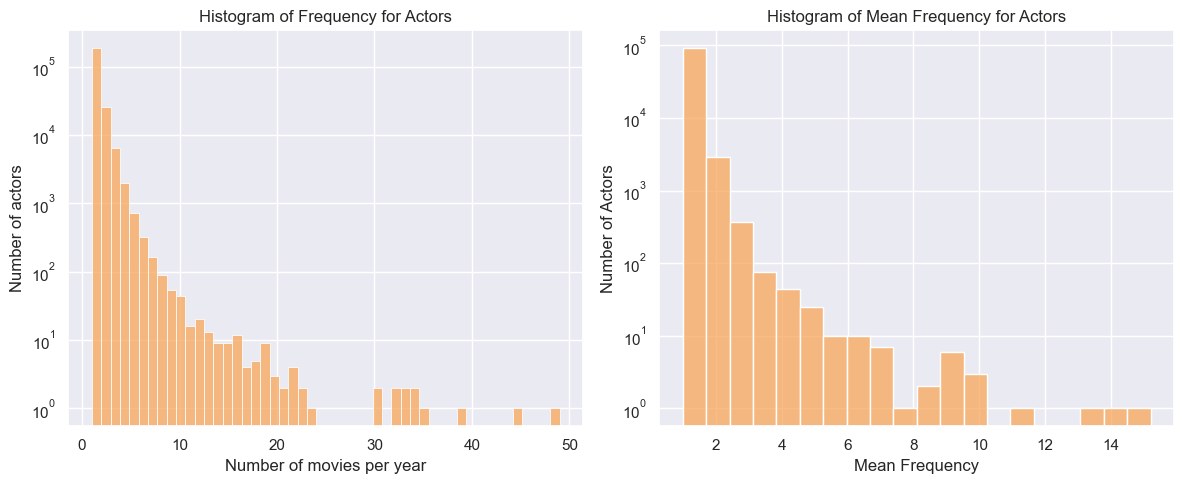

In [12]:
character_df['release_date'] = pd.to_datetime(character_df['release_date'], errors='coerce')

frequency_df = character_df.groupby(['actor_name', character_df['release_date'].dt.year]).size().reset_index(name='movie_count')

frequency_df = frequency_df.merge(character_df[['actor_name', 'gender']], on='actor_name', how='inner')
frequency_df = frequency_df.drop_duplicates(subset=['actor_name', 'release_date'])

count_char_df = pd.merge(character_df, movies_df[['movie_id', 'country']], on='movie_id', how='left')
count_char_df["country"] = (count_char_df["country"].apply(json.loads).apply(format_of_country_change))
count_char_df['region'] = count_char_df['country'].apply(get_region)

frequency_df = frequency_df.merge(count_char_df[['actor_name', 'region']], on='actor_name', how='inner')
frequency_df = frequency_df.drop_duplicates(subset=['actor_name', 'release_date'])

mean_frequency = frequency_df.groupby('actor_name')['movie_count'].mean().reset_index(name='mean_frequency')
mean_frequency = mean_frequency.merge(character_df[['actor_name', 'gender']], on='actor_name', how='inner')
mean_frequency = mean_frequency.merge(count_char_df[['actor_name', 'region']], on='actor_name', how='inner')

mean_frequency = mean_frequency.drop_duplicates(subset=['actor_name'])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(frequency_df['movie_count'], bins=50, log=True, color='#f8a65a', ax=axs[0])
axs[0].set_ylabel("Number of actors")
axs[0].set_xlabel("Number of movies per year")
axs[0].set_title('Histogram of Frequency for Actors')
axs[0].grid(True)

sns.histplot(mean_frequency['mean_frequency'], bins=20, log=True, kde=False, color='#f8a65a', ax=axs[1])
axs[1].set_xlabel('Mean Frequency')
axs[1].set_ylabel('Number of Actors')
axs[1].set_title('Histogram of Mean Frequency for Actors')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [17]:
frequency_max = frequency_df.sort_values(by='movie_count', ascending=False)

top5_frequency = frequency_max.head(5)
print("The top actors by frequency per year are :\n\n ",top5_frequency)

top5_actors_mf = mean_frequency.nlargest(5, 'mean_frequency')
print("\n\nAnd the top actors by mean frequency are :\n\n ",top5_actors_mf)

The top actors by frequency per year are :

                actor_name  release_date  movie_count gender         region
2782038  Roscoe Arbuckle        1914.0           49      M  North America
2362269     Oliver Hardy        1916.0           45      M  North America
1129307     Harold Lloyd        1919.0           39      M  North America
2781880  Roscoe Arbuckle        1913.0           35      M  North America
481818   Charlie Chaplin        1914.0           34      M  North America


And the top actors by mean frequency are :

                 actor_name  mean_frequency gender         region
1318450  Charlotte Burton            15.2      F  North America
4985633     Louise Lester            14.0      F  North America
3307334        Jack Davis            13.5    NaN  North America
9607198       Vivian Rich            11.2      F  North America
1185136    Caroline Cooke            10.0      F  North America


It's evident that during the 1910s, the United States produced a majority of male actors, particularly known for their frequent appearances in numerous movies within a single year. However, when considering mean frequency, women from the same period also displayed high participation at that time.

The context of the 1910s is crucial because during this period produced more short-movie, that demanded less effort compared to now-a-days movies. Additionally, the limited pool of available actors resulted in recurring roles for figures like Roscoe Arbuckle, Charlie Chaplin, Oliver Hardy for males, and Charlotte Burton and Louise Lester for females.

This highlights the significance of considering the production period of movies in our assessment, showcasing the distinctive conditions and factors influencing actors' involvement and industry dynamics during that time.. 

NB : We can filter all the years before 1908 which seems not very insightful, and then plot the average frequency per year with the standard deviation.

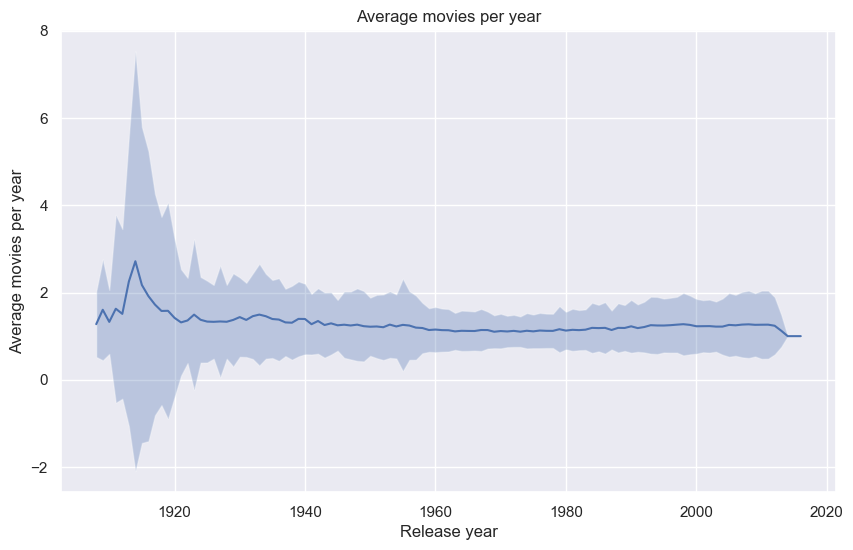

In [19]:
average_movie_count_per_year = frequency_df.groupby('release_date')['movie_count'].agg(['mean', 'std']).reset_index()
average_movie_count_per_year.columns = ['release_date', 'average_movies', 'std_dev']

average_movie_count_per_year = average_movie_count_per_year[average_movie_count_per_year['release_date'] >= 1908]

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_movie_count_per_year, x='release_date', y='average_movies')
plt.fill_between(average_movie_count_per_year['release_date'], 
                 average_movie_count_per_year['average_movies'] - average_movie_count_per_year['std_dev'],
                 average_movie_count_per_year['average_movies'] + average_movie_count_per_year['std_dev'],
                 alpha=0.3)
plt.xlabel('Release year')
plt.ylabel('Average movies per year')
plt.title('Average movies per year')
plt.grid(True)
plt.show()

### 1.2) Frequency of presence by gender

We could also focus on gender through time to grasp potential differences over time :

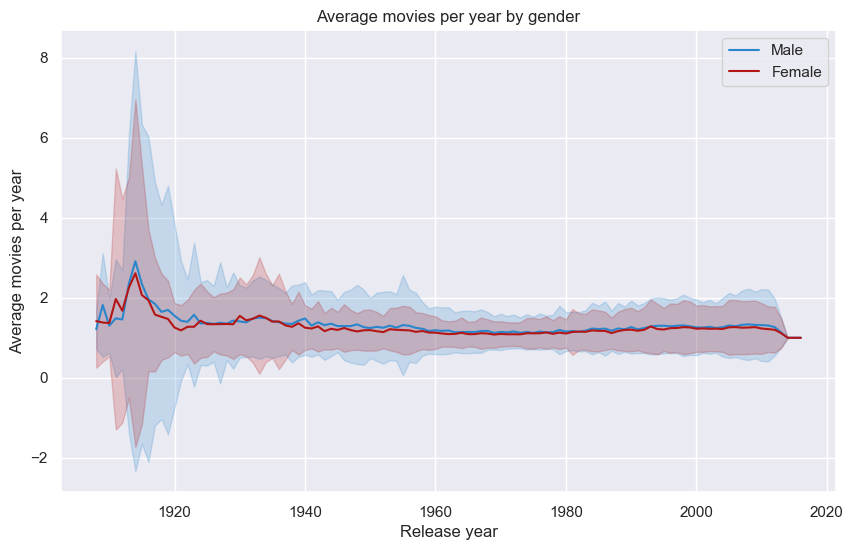

In [20]:
male_data = frequency_df[frequency_df['gender'] == 'M']
female_data = frequency_df[frequency_df['gender'] == 'F']

average_movie_count_male = male_data.groupby('release_date')['movie_count'].agg(['mean', 'std']).reset_index()
average_movie_count_male = average_movie_count_male[average_movie_count_male['release_date'] >= 1908]

average_movie_count_female = female_data.groupby('release_date')['movie_count'].agg(['mean', 'std']).reset_index()
average_movie_count_female = average_movie_count_female[average_movie_count_female['release_date'] >= 1908]

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_movie_count_male, x='release_date', y='mean', label='Male', color = '#2986cc')
plt.fill_between(average_movie_count_male['release_date'], 
                 average_movie_count_male['mean'] - average_movie_count_male['std'],
                 average_movie_count_male['mean'] + average_movie_count_male['std'],
                 alpha=0.2, color = '#2986cc')

sns.lineplot(data=average_movie_count_female, x='release_date', y='mean', label='Female', color='#b41515')
plt.fill_between(average_movie_count_female['release_date'], 
                 average_movie_count_female['mean'] - average_movie_count_female['std'],
                 average_movie_count_female['mean'] + average_movie_count_female['std'],
                 alpha=0.2, color='#b41515')

plt.xlabel('Release year')
plt.ylabel('Average movies per year')
plt.title('Average movies per year by gender')
plt.legend()
plt.grid(True)
plt.show()

### 1.3) Frequency of presence by region

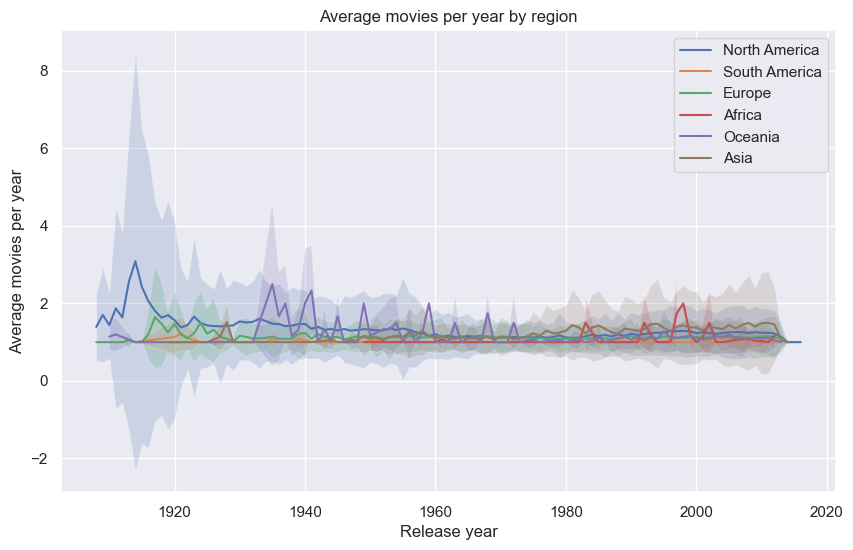

In [21]:
NA_data = frequency_df[frequency_df['region'] == 'North America']
SA_data = frequency_df[frequency_df['region'] == 'South America']
EU_data = frequency_df[frequency_df['region'] == 'Europe']
AF_data = frequency_df[frequency_df['region'] == 'Africa']
OC_data = frequency_df[frequency_df['region'] == 'Oceania']
AS_data = frequency_df[frequency_df['region'] == 'Asia']

average_movie_count_NA = NA_data.groupby('release_date')['movie_count'].agg(['mean', 'std']).reset_index()
average_movie_count_NA = average_movie_count_NA[average_movie_count_NA['release_date'] >= 1908]

average_movie_count_SA = SA_data.groupby('release_date')['movie_count'].agg(['mean', 'std']).reset_index()
average_movie_count_SA = average_movie_count_SA[average_movie_count_SA['release_date'] >= 1908]

average_movie_count_EU = EU_data.groupby('release_date')['movie_count'].agg(['mean', 'std']).reset_index()
average_movie_count_EU = average_movie_count_EU[average_movie_count_EU['release_date'] >= 1908]

average_movie_count_AF = AF_data.groupby('release_date')['movie_count'].agg(['mean', 'std']).reset_index()
average_movie_count_AF = average_movie_count_AF[average_movie_count_AF['release_date'] >= 1908]

average_movie_count_OC = OC_data.groupby('release_date')['movie_count'].agg(['mean', 'std']).reset_index()
average_movie_count_OC = average_movie_count_OC[average_movie_count_OC['release_date'] >= 1908]

average_movie_count_AS = AS_data.groupby('release_date')['movie_count'].agg(['mean', 'std']).reset_index()
average_movie_count_AS = average_movie_count_AS[average_movie_count_AS['release_date'] >= 1908]


plt.figure(figsize=(10, 6))
sns.lineplot(data=average_movie_count_NA, x='release_date', y='mean', label='North America')
plt.fill_between(average_movie_count_NA['release_date'], 
                 average_movie_count_NA['mean'] - average_movie_count_NA['std'],
                 average_movie_count_NA['mean'] + average_movie_count_NA['std'],
                 alpha=0.2)

sns.lineplot(data=average_movie_count_SA, x='release_date', y='mean', label='South America')
plt.fill_between(average_movie_count_SA['release_date'], 
                 average_movie_count_SA['mean'] - average_movie_count_SA['std'],
                 average_movie_count_SA['mean'] + average_movie_count_SA['std'],
                 alpha=0.2)

sns.lineplot(data=average_movie_count_EU, x='release_date', y='mean', label='Europe')
plt.fill_between(average_movie_count_EU['release_date'], 
                 average_movie_count_EU['mean'] - average_movie_count_EU['std'],
                 average_movie_count_EU['mean'] + average_movie_count_EU['std'],
                 alpha=0.2)

sns.lineplot(data=average_movie_count_AF, x='release_date', y='mean', label='Africa')
plt.fill_between(average_movie_count_AF['release_date'], 
                 average_movie_count_AF['mean'] - average_movie_count_AF['std'],
                 average_movie_count_AF['mean'] + average_movie_count_AF['std'],
                 alpha=0.2)

sns.lineplot(data=average_movie_count_OC, x='release_date', y='mean', label='Oceania')
plt.fill_between(average_movie_count_OC['release_date'], 
                 average_movie_count_OC['mean'] - average_movie_count_OC['std'],
                 average_movie_count_OC['mean'] + average_movie_count_OC['std'],
                 alpha=0.2)

sns.lineplot(data=average_movie_count_AS, x='release_date', y='mean', label='Asia')
plt.fill_between(average_movie_count_AS['release_date'], 
                 average_movie_count_AS['mean'] - average_movie_count_AS['std'],
                 average_movie_count_AS['mean'] + average_movie_count_AS['std'],
                 alpha=0.2)

plt.xlabel('Release year')
plt.ylabel('Average movies per year')
plt.title('Average movies per year by region')
plt.legend()
plt.grid(True)
plt.show()

We can see that even if the mean frequency remains constant over time (with a peak in the 1910s in the US as seen before) and that there are not a lot of differences between men and women, considering the datas over time highlights different trends over time (the American moguls in 1910s, the emergence of Asian movie since the 1970 which corresponds to Bollywood golden era : https://www.nfi.edu/what-is-bollywood/#:~:text=Bollywood%2C%20often%20known%20as%20the,around%201000%20films%20every%20year.). 

## 2. Career span of actors

While some actors gain fame by appearing in numerous movies within a short timeframe, others achieve recognition due to their everlasting careers. Our focus now is to examine the career spans of each actor, taking into account their first and last appearances in the provided dataset.

Our analysis will delve into regional and gender differences, with a look at mid-career age (where available) to assess whether commencing a career at a young age holds significance in an actor's trajectory.

### 2.2) Career span of actors by gender

Mean career span for male actors: 13.08 years (+/-  11.21) 
Mean career span for female actors: 11.38 years (+/- 10.74) 


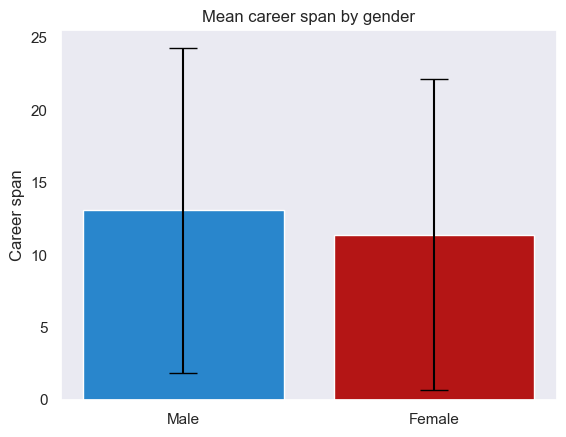

In [28]:
character_df['release_date'] = pd.to_datetime(character_df['release_date'], errors='coerce')

actor_career_span = character_df.groupby('actor_name')['release_date'].agg(['min', 'max']).reset_index()
actor_career_span['career_span'] = (actor_career_span['max'] - actor_career_span['min']).dt.days / 365

# Avoid anomalies due to missing values
span_thresh = 50  
actor_career_span = actor_career_span[(actor_career_span['career_span'] != 0) & (actor_career_span['career_span'] < span_thresh)]

actor_career_span = actor_career_span.merge(character_df[['actor_name', 'actor_age_at_movie_release', 'gender']], on='actor_name', how='inner')
actor_career_span['mid_career_age'] = (actor_career_span['actor_age_at_movie_release'] + actor_career_span['career_span']) / 2
actor_career_span = actor_career_span.rename(columns={"actor_age_at_movie_release": "age at last movie"})

actor_career_span = actor_career_span.merge(count_char_df[['actor_name', 'region']], on='actor_name', how='inner')
actor_career_span = actor_career_span.drop_duplicates(subset=['actor_name', 'career_span', 'gender'])

# Gender analysis 
male_actors = actor_career_span[actor_career_span['gender'] == 'M']
female_actors = actor_career_span[actor_career_span['gender'] == 'F']

mean_career_span_male = male_actors['career_span'].mean()
std_career_span_male = male_actors['career_span'].std()
mean_career_span_female = female_actors['career_span'].mean()
std_career_span_female = female_actors['career_span'].std()

print(f"Mean career span for male actors: {mean_career_span_male:.2f} years (+/-  {std_career_span_male:.2f}) ")
print(f"Mean career span for female actors: {mean_career_span_female:.2f} years (+/- {std_career_span_female:.2f}) ")

labels = ['Male', 'Female']
bar_colors = ['#2986cc', '#b41515']
x_pos = range(len(labels))
plt.bar(x_pos, [mean_career_span_male, mean_career_span_female],
        yerr=[std_career_span_male, std_career_span_female],
        align='center', ecolor='black', capsize=10, color=bar_colors)
plt.xticks(x_pos, labels)
plt.ylabel('Career span')
plt.title('Mean career span by gender')
plt.grid()
plt.show()

This is a relatively high variance, so we can not assess anything about the career span of male or female yet. Let's try to do a t-test :

If the p-value is inferior to 0.05, we could assess that there is strong evidence about the difference between male and female actors.

In [29]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(male_actors['career_span'], female_actors['career_span'])

print(f"t-statistic: {t_statistic:.2f}, p-value: {p_value:.4f}")

t-statistic: 13.15, p-value: 0.0000


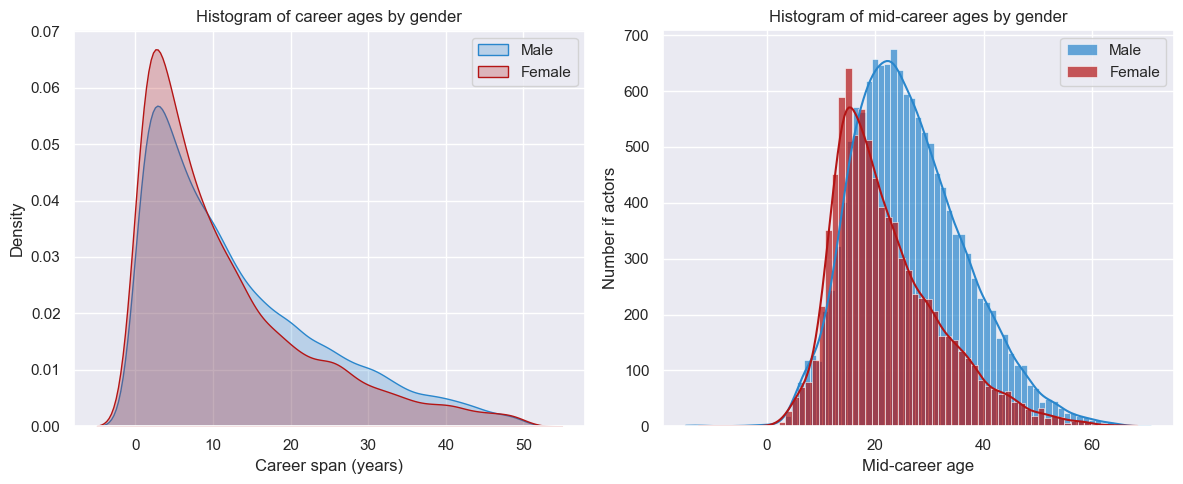

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(male_actors['career_span'], label='Male', shade=True, color='#2986cc', ax=axs[0])
sns.kdeplot(female_actors['career_span'], label='Female', shade=True, color='#b41515', ax=axs[0])
axs[0].set_xlabel('Career span (years)')
axs[0].set_ylabel('Density')
axs[0].set_title('Histogram of career ages by gender')
axs[0].legend()
axs[0].grid(True)

male_mid_career = actor_career_span[actor_career_span['gender'] == 'M']['mid_career_age']
female_mid_career = actor_career_span[actor_career_span['gender'] == 'F']['mid_career_age']

sns.histplot(male_mid_career, kde=True, label='Male', color='#2986cc', alpha=0.7, ax=axs[1])
sns.histplot(female_mid_career, kde=True, label='Female', color='#b41515', alpha=0.7, ax=axs[1])

axs[1].set_xlabel('Mid-career age')
axs[1].set_ylabel('Number if actors')
axs[1].set_title('Histogram of mid-career ages by gender')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

Examining these two histograms, a glaring disparity emerges between men and women. It's evident that women generally exhibit a lower mid-career age and tend to have a shorter career span compared to men.

### 2.2) Career span of actors by region

Mean career span for North America actors: 12.47 years (+/-  10.98) 
Mean career span for South America actors: 10.59 years (+/- 10.28) 
Mean career span for Europe actors: 12.62 years (+/-  11.56) 
Mean career span for Asia actors: 11.23 years (+/- 10.66) 
Mean career span for Africa actors: 8.40 years (+/-  8.84) 
Mean career span for Oceania actors: 11.45 years (+/- 10.44) 


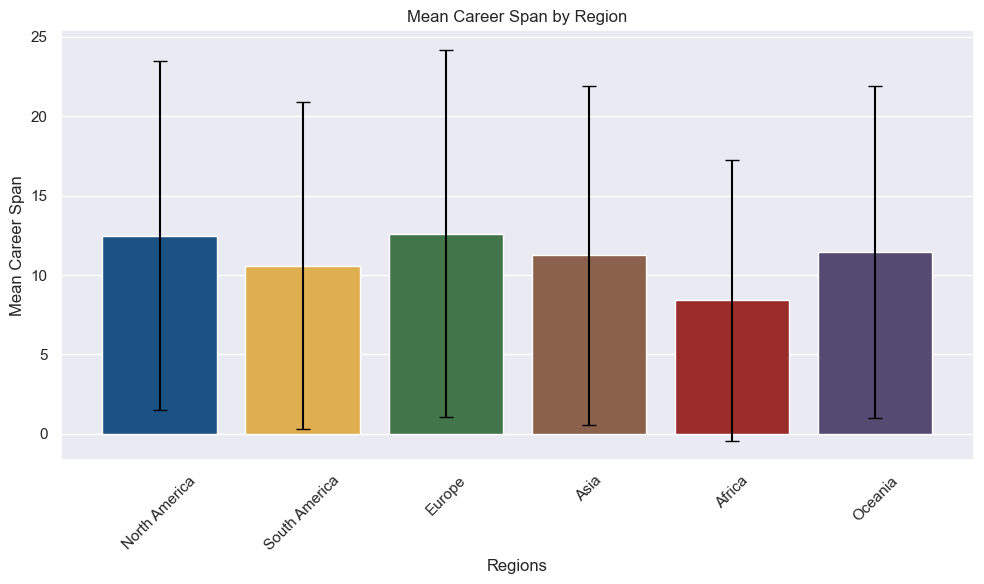

In [30]:
NA_actors = actor_career_span[actor_career_span['region'] == 'North America']
SA_actors = actor_career_span[actor_career_span['region'] == 'South America']
EU_actors = actor_career_span[actor_career_span['region'] == 'Europe']
AS_actors = actor_career_span[actor_career_span['region'] == 'Asia']
AF_actors = actor_career_span[actor_career_span['region'] == 'Africa']
OC_actors = actor_career_span[actor_career_span['region'] == 'Oceania']

mean_career_span_NA = NA_actors['career_span'].mean()
std_career_span_NA = NA_actors['career_span'].std()
mean_career_span_SA = SA_actors['career_span'].mean()
std_career_span_SA = SA_actors['career_span'].std()
mean_career_span_EU = EU_actors['career_span'].mean()
std_career_span_EU = EU_actors['career_span'].std()
mean_career_span_AS = AS_actors['career_span'].mean()
std_career_span_AS = AS_actors['career_span'].std()
mean_career_span_AF = AF_actors['career_span'].mean()
std_career_span_AF = AF_actors['career_span'].std()
mean_career_span_OC = OC_actors['career_span'].mean()
std_career_span_OC = OC_actors['career_span'].std()

print(f"Mean career span for North America actors: {mean_career_span_NA:.2f} years (+/-  {std_career_span_NA:.2f}) ")
print(f"Mean career span for South America actors: {mean_career_span_SA:.2f} years (+/- {std_career_span_SA:.2f}) ")
print(f"Mean career span for Europe actors: {mean_career_span_EU:.2f} years (+/-  {std_career_span_EU:.2f}) ")
print(f"Mean career span for Asia actors: {mean_career_span_AS:.2f} years (+/- {std_career_span_AS:.2f}) ")
print(f"Mean career span for Africa actors: {mean_career_span_AF:.2f} years (+/-  {std_career_span_AF:.2f}) ")
print(f"Mean career span for Oceania actors: {mean_career_span_OC:.2f} years (+/- {std_career_span_OC:.2f}) ")

regions = ['North America', 'South America', 'Europe', 'Asia', 'Africa', 'Oceania']
mean_career_spans = [mean_career_span_NA, mean_career_span_SA, mean_career_span_EU, mean_career_span_AS, mean_career_span_AF, mean_career_span_OC]
std_career_spans = [std_career_span_NA, std_career_span_SA, std_career_span_EU, std_career_span_AS, std_career_span_AF, std_career_span_OC]

colors = ['#0b5394', '#f7b538', '#3a7d44', '#955e42', '#ac1a1a', '#524379']

plt.figure(figsize=(10, 6))

sns.barplot(x=regions, y=mean_career_spans, palette=colors, errorbar='sd')
plt.errorbar(x=regions, y=mean_career_spans, yerr=std_career_spans, fmt='none', ecolor='black', capsize=5)

plt.xlabel('Regions')
plt.ylabel('Mean Career Span')
plt.title('Mean Career Span by Region')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It is interesting to see that in Europe and North America, actors seem to have a greater career span than others. Let's look at their respective mid career age and density : 

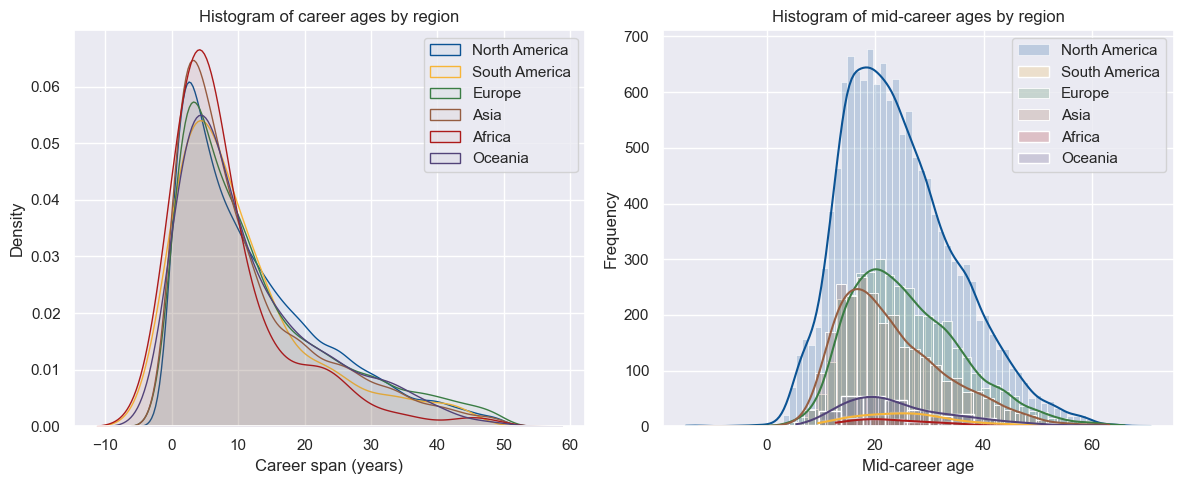

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(NA_actors['career_span'], label='North America', shade=True, color='#0b5394', alpha=0.05, ax=axs[0])
sns.kdeplot(SA_actors['career_span'], label='South America', shade=True, color='#f7b538', alpha=0.05, ax=axs[0])
sns.kdeplot(EU_actors['career_span'], label='Europe', shade=True, color='#3a7d44', alpha=0.05, ax=axs[0])
sns.kdeplot(AS_actors['career_span'], label='Asia', shade=True, color='#955e42', alpha=0.05, ax=axs[0])
sns.kdeplot(AF_actors['career_span'], label='Africa', shade=True, color='#ac1a1a', alpha=0.05, ax=axs[0])
sns.kdeplot(OC_actors['career_span'], label='Oceania', shade=True, color='#524379', alpha=0.05, ax=axs[0])

axs[0].set_xlabel('Career span (years)')
axs[0].set_ylabel('Density')
axs[0].set_title('Histogram of career ages by region')
axs[0].legend()
axs[0].grid(True)

NA_mid_career = actor_career_span[actor_career_span['region'] == 'North America']['mid_career_age']
SA_mid_career = actor_career_span[actor_career_span['region'] == 'South America']['mid_career_age']
EU_mid_career = actor_career_span[actor_career_span['region'] == 'Europe']['mid_career_age']
AS_mid_career = actor_career_span[actor_career_span['region'] == 'Asia']['mid_career_age']
AF_mid_career = actor_career_span[actor_career_span['region'] == 'Africa']['mid_career_age']
OC_mid_career = actor_career_span[actor_career_span['region'] == 'Oceania']['mid_career_age']

sns.histplot(NA_mid_career, kde=True, label='North America', color='#0b5394', alpha=0.2, ax=axs[1])
sns.histplot(SA_mid_career, kde=True, label='South America', color='#f7b538', alpha=0.2, ax=axs[1])
sns.histplot(EU_mid_career, kde=True, label='Europe', color='#3a7d44', alpha=0.2, ax=axs[1])
sns.histplot(AS_mid_career, kde=True, label='Asia', color='#955e42', alpha=0.2, ax=axs[1])
sns.histplot(AF_mid_career, kde=True, label='Africa', color='#ac1a1a', alpha=0.2, ax=axs[1])
sns.histplot(OC_mid_career, kde=True, label='Oceania', color='#524379', alpha=0.2, ax=axs[1])

axs[1].set_xlabel('Mid-career age')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of mid-career ages by region')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

The analysis reveals that actors in South America and Europe tend to have a higher mid-career age compared to those in other regions, while those in Asia and Oceania exhibit a lower mid-career age. Although the dataset for Africa is limited, it suggests a trend toward shorter career spans, whereas the distribution in other regions appears more varied and diverse.
In the second plot, it's crucial to note that no actors have a negative career span, despite an apparent error that comes from the Kernel Density Estimator (KDE) utilized for the plot. 

## 3. Number of movies per actor

Finally, despite the insights we got from the combined analyses of frequency and career span, it's crucial to consider the total number of movies an actor has made throughout their career. This step is essential due to potential missing values in the initial dataset and the impact that career breaks might have on reducing the mean frequency.

This forthcoming analysis will specifically concentrate on the density of movies produced, by gender and region. By examining movie density across these parameters, we aim to gain a more comprehensive understanding on the measuring of success. 

### 3.1) General analysis

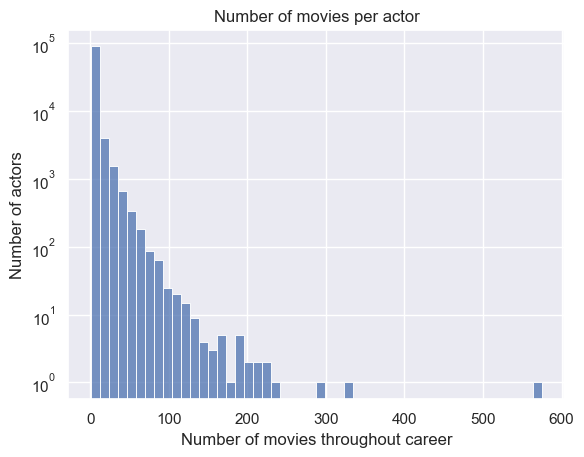

                actor_name gender  total_movie_count         region
254905           Mel Blanc      M                575  North America
267366  Mithun Chakraborty      M                328          Other
284085        Oliver Hardy      M                299  North America
268496            Mohanlal      M                234           Asia
237509           Mammootty      M                225          Other


In [34]:
actor_nb_movie = character_df.groupby(['actor_name', 'gender', 'movie_id']).size().reset_index(name='appearance_count')
actor_nb_movie = actor_nb_movie.groupby(['actor_name', 'gender']).size().reset_index(name='total_movie_count')
actor_nb_movie = actor_nb_movie.merge(count_char_df[['actor_name', 'region']], on='actor_name', how='inner')
actor_nb_movie = actor_nb_movie.drop_duplicates(subset=['actor_name'])


sns.histplot(actor_nb_movie, x='total_movie_count', bins=50, log=True)
plt.ylabel("Number of actors")
plt.xlabel("Number of movies throughout career")
plt.title("Number of movies per actor")
plt.show()

sorted_actors = actor_nb_movie.sort_values(by='total_movie_count', ascending=False) 
top_5_actors_corrected = sorted_actors.head(5)
print(top_5_actors_corrected)

The top 5 is mainly composed of mens, let's try to compare with women. In fact, we may have to consider productions locally, because the leaderboard is exclusively from America in the early ages of cinema and from India now-a-days, for example.

### 3.2) Number of movies by gender

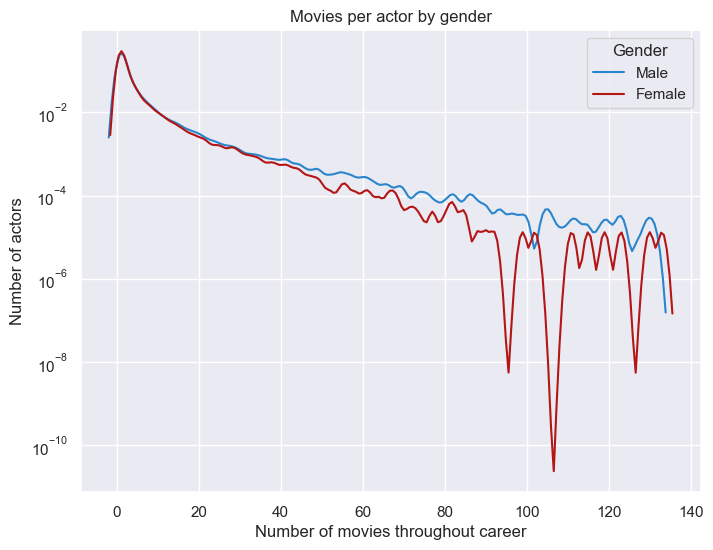

In [25]:
male_data = actor_nb_movie[actor_nb_movie['gender'] == 'M']
female_data = actor_nb_movie[actor_nb_movie['gender'] == 'F']

# The max number of movies for women are 133 so we filter values above to compare
male_filtered = male_data[male_data['total_movie_count'] <= 133]
female_filtered = female_data[female_data['total_movie_count'] <= 133]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=male_filtered['total_movie_count'], label='Male', color = '#2986cc')
sns.kdeplot(data=female_filtered['total_movie_count'], label='Female', color = '#b41515')

plt.yscale('log')
plt.ylabel("Density of actors")
plt.xlabel("Number of movies throughout career")
plt.title("Movies per actor by gender")
plt.legend(title='Gender')
plt.show()

There are noticeable disparities between males and females in terms of the number of movies made (we applied a threshold to the male dataset for a clearer plot), with males generally being more numerous and having a higher overall number of movies. However, despite these differences, both genders exhibit a similar distribution pattern in terms of movie density.

It is also crucial to highlight that the 'V' gaps in the plot result from missing values at specific movie counts — there are no actors with that exact number of movies.

### 3.3) Number of movies per region

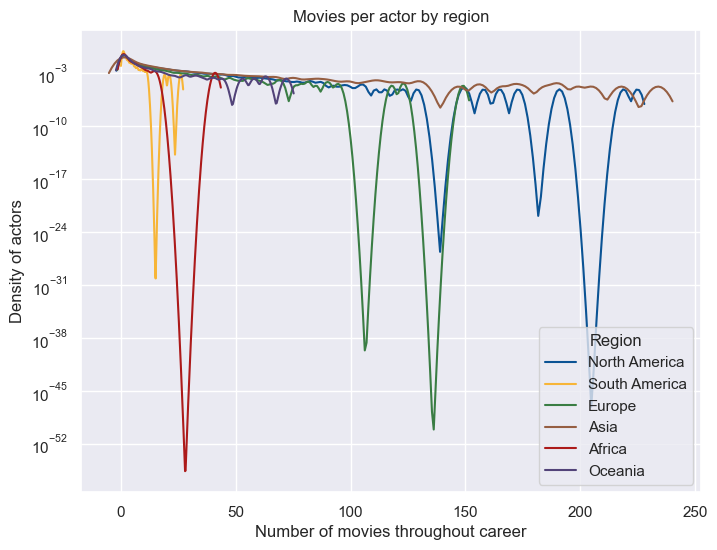

In [40]:
NA_films = actor_nb_movie[actor_nb_movie['region'] == 'North America']
SA_films = actor_nb_movie[actor_nb_movie['region'] == 'South America']
EU_films = actor_nb_movie[actor_nb_movie['region'] == 'Europe']
AS_films = actor_nb_movie[actor_nb_movie['region'] == 'Asia']
AF_films = actor_nb_movie[actor_nb_movie['region'] == 'Africa']
OC_films = actor_nb_movie[actor_nb_movie['region'] == 'Oceania']

# Filtering here too for clarity (North America goes all over to 500)
NA_films_filtered = NA_films[NA_films['total_movie_count'] <= 250]
SA_films_filtered = SA_films[SA_films['total_movie_count'] <= 250]
EU_films_filtered = EU_films[EU_films['total_movie_count'] <= 250]
AS_films_filtered = AS_films[AS_films['total_movie_count'] <= 250]
AF_films_filtered = AF_films[AF_films['total_movie_count'] <= 250]
OC_films_filtered = OC_films[OC_films['total_movie_count'] <= 250]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=NA_films_filtered['total_movie_count'], label='North America', color = '#0b5394')
sns.kdeplot(data=SA_films_filtered['total_movie_count'], label='South America', color = '#f7b538')
sns.kdeplot(data=EU_films_filtered['total_movie_count'], label='Europe', color = '#3a7d44')
sns.kdeplot(data=AS_films_filtered['total_movie_count'], label='Asia', color = '#955e42')
sns.kdeplot(data=AF_films_filtered['total_movie_count'], label='Africa', color = '#ac1a1a')
sns.kdeplot(data=OC_films_filtered['total_movie_count'], label='Oceania', color = '#524379')

plt.yscale('log') 

plt.ylabel("Density of actors")
plt.xlabel("Number of movies throughout career")
plt.title("Movies per actor by region")
plt.legend(title='Region')

plt.show()

Regionally, glaring disparities in distribution are noticeable. In particular, North America and Asia stand out as the only regions where a few actors have more than 200 movie appearances. In contrary, South America, Africa, and Oceania demonstrate significantly fewer actors with numerous movie appearances.

## 4. Combining all three factors

To have a comprehensive longevity score, our approach involves mixing the insights obtained from the three analyses conducted earlier. We tried to synthesize these findings by firstly generate a pairplot to visualize relationships between the variables studied across frequency, career span, and number of movies. Then, we aim to construct a distribution of scores that harmonizes these diverse aspects, allowing us to create a meaningful evaluation.

### 4.1) Pairplot 

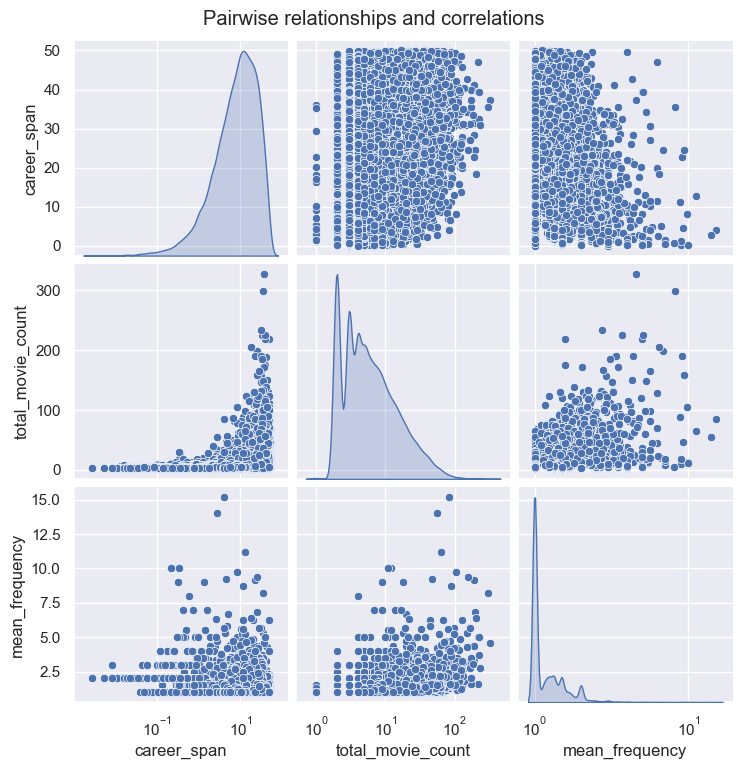

In [42]:
freq_span_nbmv = pd.merge(mean_frequency, actor_career_span, on=['actor_name', 'gender', 'region'])
freq_span_nbmv = pd.merge(freq_span_nbmv, actor_nb_movie, on=['actor_name', 'gender', 'region'])
freq_span_nbmv.dropna(subset=['career_span', 'total_movie_count', 'mean_frequency'], inplace=True)

data_pairplot = freq_span_nbmv[['career_span', 'total_movie_count', 'mean_frequency']]

sns.pairplot(data_pairplot, diag_kind='kde', diag_kws={'log_scale': 10})
plt.suptitle('Pairwise relationships and correlations', y=1.02)
plt.show()

The pairplot effectively reveals interdependencies among the three attributes. In fact, it reveals causal relationships: higher career span tends to correlate with higher total movie count, although the reverse isn't necessarily true. Moreover, there appears to be a positive correlation between frequency and both the number of movies and career span.

### 4.2) Final score for longevity

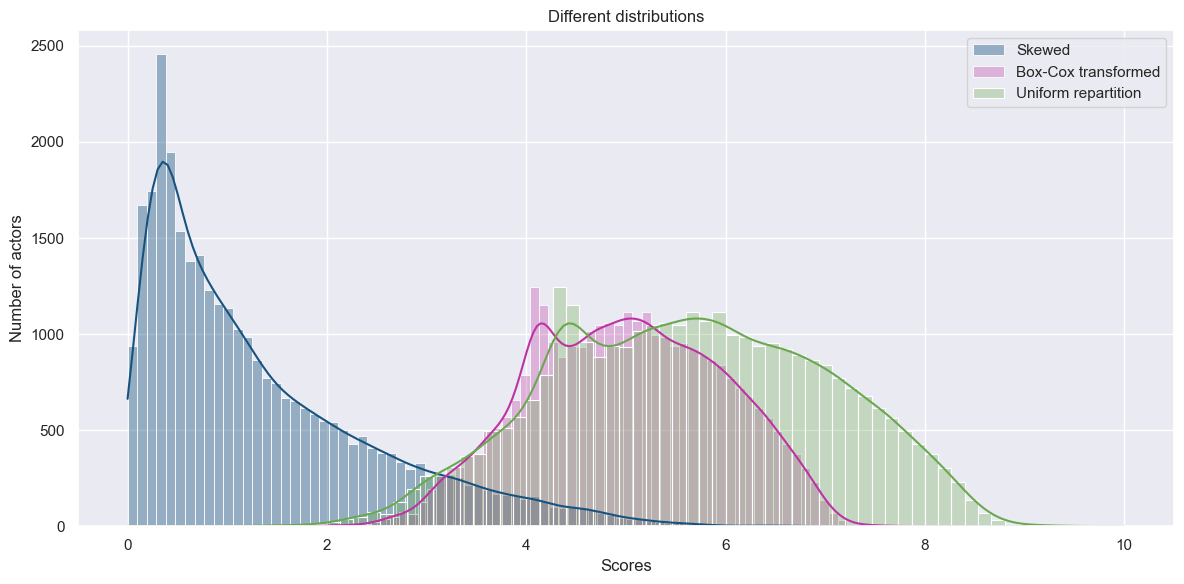

count    31624.000000
mean         5.639477
std          1.373878
min          0.000000
25%          4.574634
50%          5.638891
75%          6.687040
max         10.000000
Name: weighted_score, dtype: float64

In [39]:
normalized_data = (freq_span_nbmv[['mean_frequency', 'career_span', 'total_movie_count']] - freq_span_nbmv[['mean_frequency', 'career_span', 'total_movie_count']].min()) / (freq_span_nbmv[['mean_frequency', 'career_span', 'total_movie_count']].max() - freq_span_nbmv[['mean_frequency', 'career_span', 'total_movie_count']].min())

weights = {'mean_frequency': 0.33333, 'career_span': 0.33333, 'total_movie_count': 0.3333}
weighted_score = (normalized_data['mean_frequency'] * weights['mean_frequency']) + (normalized_data['career_span'] * weights['career_span']) + (normalized_data['total_movie_count'] * weights['total_movie_count'])

rescaled_score = (weighted_score - weighted_score.min()) / (weighted_score.max() - weighted_score.min()) * 10 + 0.00001
freq_span_nbmv['weighted_score'] = rescaled_score

# Box-Cox transformation
transformed_scores, lambda_value = stats.boxcox(rescaled_score)
mean_of_transformed_scores = np.mean(transformed_scores)

factor = 5 - mean_of_transformed_scores
adjusted_scores = transformed_scores + factor

min_score = np.min(adjusted_scores)
max_score = np.max(adjusted_scores)

scaled_scores = ((adjusted_scores - min_score) / (max_score - min_score)) * 10

plt.figure(figsize=(12, 6))

sns.histplot(rescaled_score, kde=True, color = '#16537e', label = 'Skewed', alpha = 0.4)
sns.histplot(adjusted_scores, kde=True, color = '#bd33a4', label = 'Box-Cox transformed', alpha = 0.3)
sns.histplot(scaled_scores, kde=True, color = '#6aa84f', label = 'Uniform repartition', alpha = 0.3)

plt.xlabel('Scores')
plt.ylabel('Number of actors')
plt.title('Different distributions')

plt.legend()
plt.tight_layout()
plt.show()

freq_span_nbmv['weighted_score'] = scaled_scores
freq_span_nbmv['weighted_score'].describe()

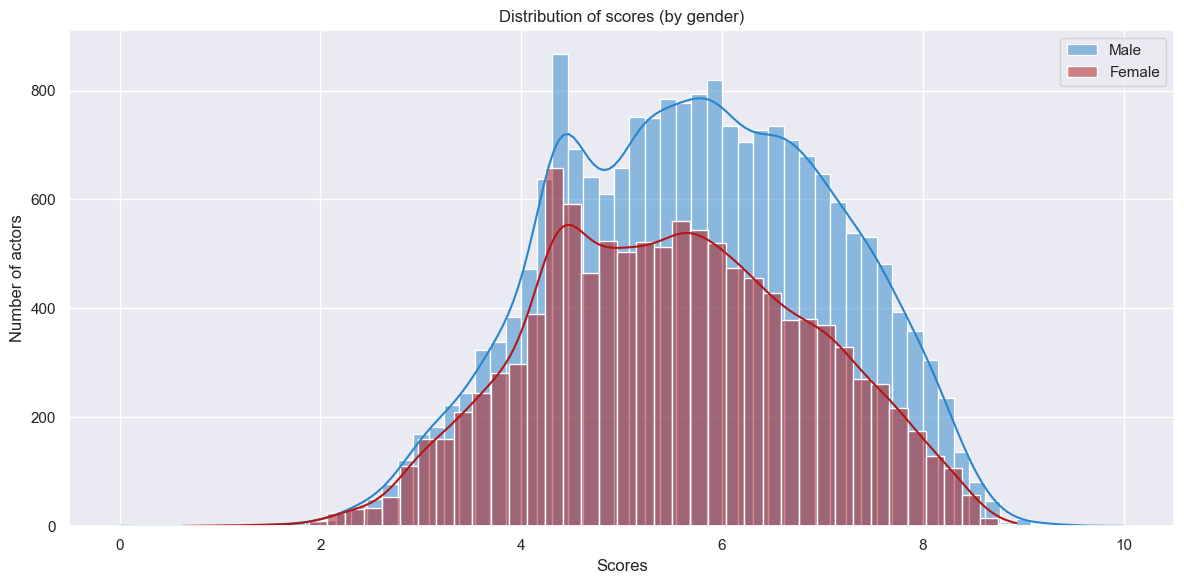

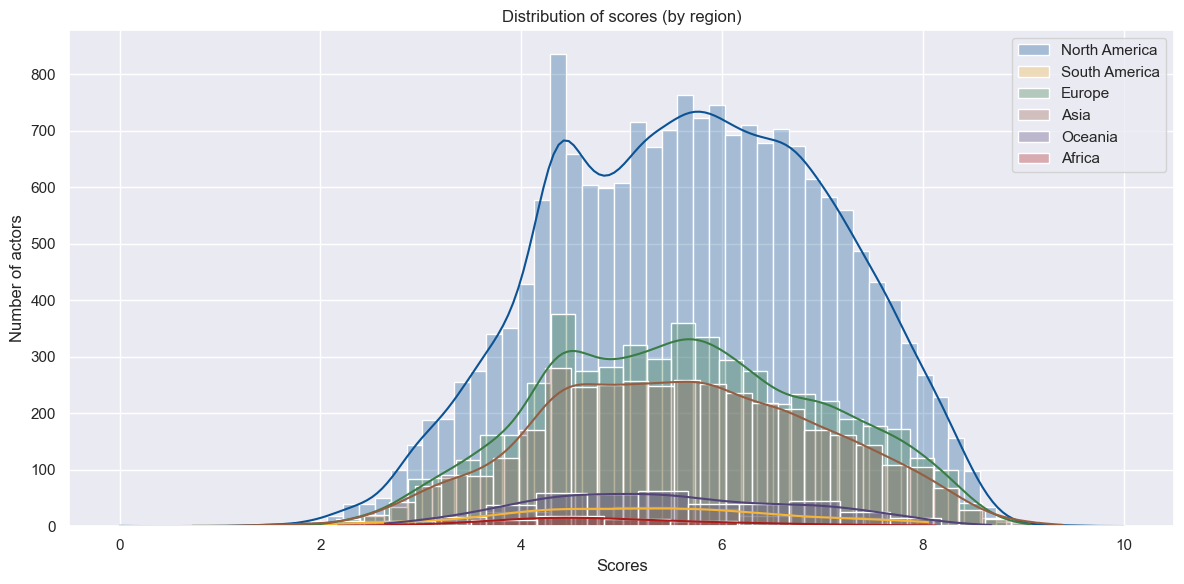

In [32]:
male_freq_span_nbmv = freq_span_nbmv[freq_span_nbmv['gender'] == 'M']
female_freq_span_nbmv = freq_span_nbmv[freq_span_nbmv['gender'] == 'F']

NA_freq_span_nbmv = freq_span_nbmv[freq_span_nbmv['region'] == 'North America']
SA_freq_span_nbmv = freq_span_nbmv[freq_span_nbmv['region'] == 'South America']
EU_freq_span_nbmv = freq_span_nbmv[freq_span_nbmv['region'] == 'Europe']
AS_freq_span_nbmv = freq_span_nbmv[freq_span_nbmv['region'] == 'Asia']
OC_freq_span_nbmv = freq_span_nbmv[freq_span_nbmv['region'] == 'Oceania']
AF_freq_span_nbmv = freq_span_nbmv[freq_span_nbmv['region'] == 'Africa']

plt.figure(figsize=(12, 6))

sns.histplot(male_freq_span_nbmv['weighted_score'], kde=True, label='Male',color='#2986cc')
sns.histplot(female_freq_span_nbmv['weighted_score'], kde=True, label='Female',color='#b41515')
plt.xlabel('Scores')
plt.ylabel('Number of actors')
plt.title('Distribution of scores (by gender)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

sns.histplot(NA_freq_span_nbmv['weighted_score'], kde=True, label='North America',color='#0b5394', alpha = 0.3)
sns.histplot(SA_freq_span_nbmv['weighted_score'], kde=True, label='South America',color='#f7b538', alpha = 0.3)
sns.histplot(EU_freq_span_nbmv['weighted_score'], kde=True, label='Europe',color='#3a7d44', alpha = 0.3)
sns.histplot(AS_freq_span_nbmv['weighted_score'], kde=True, label='Asia',color='#955e42', alpha = 0.3)
sns.histplot(OC_freq_span_nbmv['weighted_score'], kde=True, label='Oceania',color='#524379', alpha = 0.3)
sns.histplot(AF_freq_span_nbmv['weighted_score'], kde=True, label='Africa',color='#ac1a1a', alpha = 0.3)

plt.xlabel('Scores')
plt.ylabel('Number of actors')
plt.title('Distribution of scores (by region)')
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
top_actors = freq_span_nbmv.sort_values(by='weighted_score', ascending=False)
top_actors.head(10)

,actor_name,mean_frequency,gender,region,min,max,career_span,actor_age_at_movie_release,mid_career_age,total_movie_count,weighted_score
22485,Oliver Hardy,8.187500,M,North America,1914-04-21,1949-09-15,35.427397,NaN,NaN,299,10.000000
21217,Mithun Chakraborty,4.567568,M,Other,1976-01-01,2013-05-15,37.394521,44.0,40.697260,328,9.850422
21249,Moe Howard,5.030303,M,North America,1930-09-28,1970-02-05,39.383562,NaN,NaN,225,9.542929
17141,Larry Fine,5.000000,M,North America,1930-09-28,1970-02-05,39.383562,55.0,47.191781,219,9.515507
7017,Dharmendra Deol,1.586207,M,Asia,1964-10-08,2011-10-27,47.082192,75.0,61.041096,218,9.392710
10959,Harold Lloyd,9.150000,M,North America,1913-05-08,1936-02-07,22.767123,NaN,NaN,191,9.341495
1138,Amitabh Bachchan,3.297297,M,Asia,1972-02-23,2013-05-10,41.238356,NaN,NaN,189,9.271122
25781,Roscoe Arbuckle,9.375000,M,North America,1909-07-01,1933-12-30,24.515068,NaN,NaN,158,9.269243
9316,Frank Welker,4.323529,M,North America,1969-12-31,2012-10-09,42.802740,30.0,36.401370,150,9.248137
18820,Mammootty,3.714286,M,Other,1980-05-16,2012-10-19,32.449315,43.0,37.724658,225,9.217608
